## 모듈과 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import uniform,randint
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

## 자료 불러와서 데이타프레임으로 만들기

In [2]:
df=pd.read_csv('c:/Users/hcwan/Desktop/titanic kaggle/train.csv')#모델 훈련용 train.csv파일 데이타프레임으로 만들기
df_t=pd.read_csv('c:/Users/hcwan/Desktop/titanic kaggle/test.csv')#최종테스트용 test.csv파일 데이타프레임으로 만들기
print(df.info())#불러온 데이타프레임의 정보 -> Non값유무와 데이터타입 확인
df.head()#눈으로 직접 확인하기 위한 데이타 프레임 일부분 출력


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 전처리 과정------------------

In [3]:
df_1=df.dropna(axis=1,thresh=500)#Null 값 많은 열 삭제 여기서는 Cabin
df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))#Age 컬럼 Null값은 해당 컬럼의 평균값으로 대체
df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())
#Embarked의 Null값은 2개이므로 가장 많이 나온 항목명으로 대체
df_1.info()#Non값 없는것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\hcwan\AppData\Local\Temp\ipykernel_1856\3730623908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))#Age 컬럼 Null값은 해당 컬럼의 평균값으로 대체
C:\Users\hcwan\AppData\Local\Temp\ipykernel_1856\3730623908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())


## test 데이터 전처리과정

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:

df_tt=df_t.dropna(axis=1,thresh=300)#null값 많은 Cabin 컬럼 항목 삭제
df_tt['Age']=df_tt['Age'].fillna(df['Age'].mean(axis=0))#나이 탑승지 항목 평균값과 최다값으로 변경
df_tt['Fare']=df_tt['Fare'].fillna(df['Fare'].median(axis=0))#요금은 중간값으로 대처
df_tt['Embarked']=df_tt['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())

df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


C:\Users\hcwan\AppData\Local\Temp\ipykernel_1856\1976242655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['Age']=df_tt['Age'].fillna(df['Age'].mean(axis=0))#나이 탑승지 항목 평균값과 최다값으로 변경
C:\Users\hcwan\AppData\Local\Temp\ipykernel_1856\1976242655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['Fare']=df_tt['Fare'].fillna(df['Fare'].median(axis=0))#요금은 중간값으로 대처
C:\Users\hcwan\AppData\Local\Temp\ipykernel_1856\1976242655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

## str 오브젝트가 포함되어 있는 컬럼인 이름과 티켓 항목을 제외

In [6]:
df_2=df_1.set_index('PassengerId')
df_2=df_2.iloc[:,[0,1,3,4,5,6,8,9]]
print(df_2.head())
df_t2=df_tt.set_index('PassengerId')
df_t2=df_t2.iloc[:,[0,2,3,4,5,7,8,]]
df_t2.head()


             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


## 데이터를 표로 만들어 시각화해보기(train데이터)

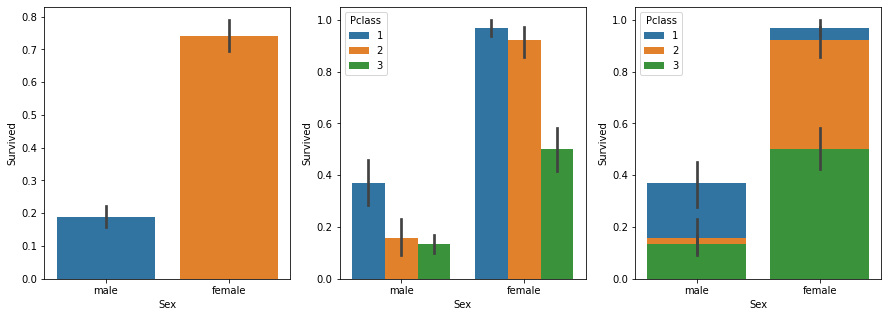

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='Sex', y='Survived', data=df_2, ax=ax1)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass', ax=ax2)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass',
            dodge=False, ax=ax3)

plt.show()

## 산포그래프로 생존표시까지 함께 보기

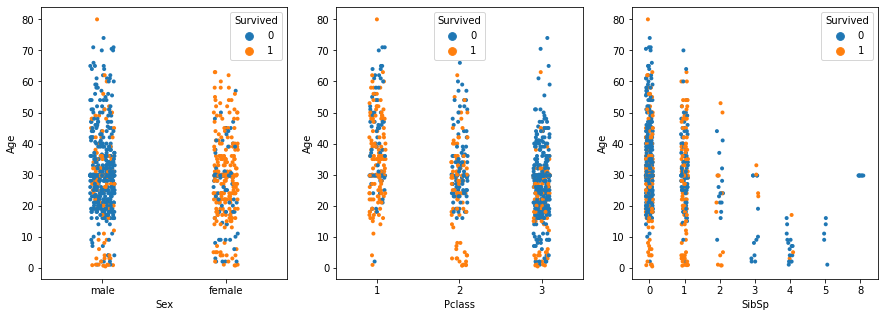

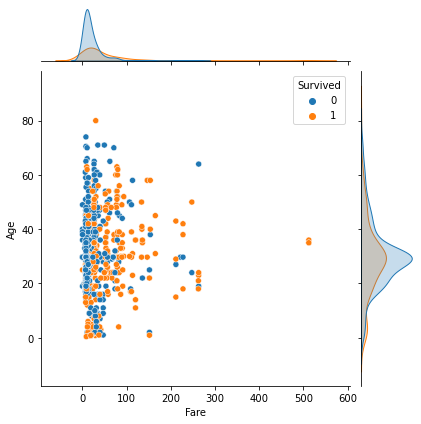

In [8]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# sns.swarmplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='Sex',y='Age',data=df_2,ax=ax1,size=4,hue='Survived')
sns.stripplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='SibSp',y='Age',data=df_2,ax=ax3,size=4,hue='Survived')
sns.jointplot(x='Fare',y='Age',data=df_2,hue='Survived')
# sns.jointplot(x='Sex',y='Pclass',data=df_2,hue='Survived')
# sns.jointplot(x='Embarked',y='Fare',data=df_2,hue='Survived')
plt.show()

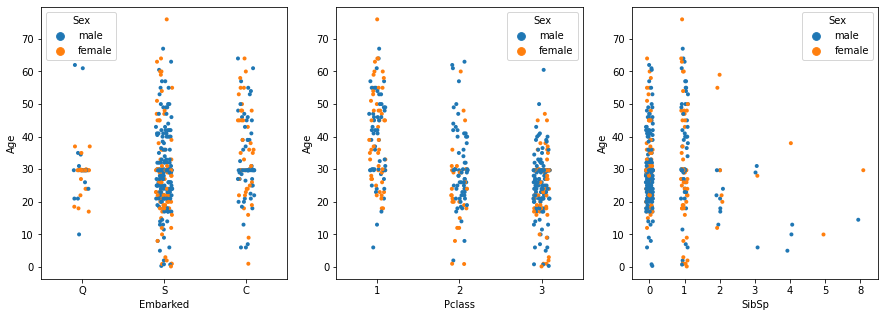

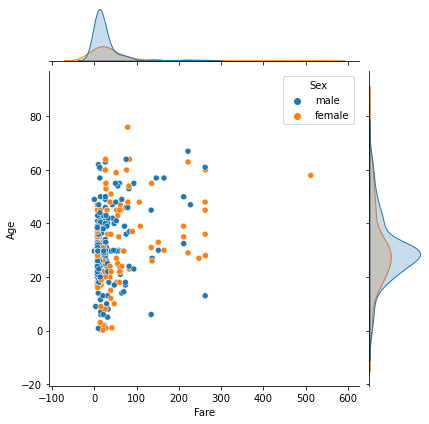

In [9]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)


sns.stripplot(x='Embarked',y='Age',data=df_t2,ax=ax1,size=4,hue='Sex')
sns.stripplot(x='Pclass',y='Age',data=df_t2,ax=ax2,size=4,hue='Sex')
sns.stripplot(x='SibSp',y='Age',data=df_t2,ax=ax3,size=4,hue='Sex')
sns.jointplot(x='Fare',y='Age',data=df_t2,hue='Sex')
# sns.jointplot(x='Sex',y='Pclass',data=df_2,hue='Survived')
# sns.jointplot(x='Embarked',y='Fare',data=df_2,hue='Survived')
plt.show()

## 성별,Pclass 카테고리를 int형으로 변경

In [10]:
df_2.replace(['female','male'],[0,1],inplace=True)
df_2.replace(['S','C','Q'],[1,2,3],inplace=True)
print(df_2.head())
df_t2.replace(['female','male'],[0,1],inplace=True)
df_t2.replace(['S','C','Q'],[1,2,3],inplace=True)
df_t2.head()



             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         1
2                   1       1    0  38.0      1      0  71.2833         2
3                   1       3    0  26.0      0      0   7.9250         1
4                   1       1    0  35.0      1      0  53.1000         1
5                   0       3    1  35.0      0      0   8.0500         1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,0,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,0,22.0,1,1,12.2875,1


## 데이타 프레임을 모델 훈련용 numpy형식으로 변경 그리고 타깃값 추출

In [11]:

X_data=df_2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
X_tdata=df_t2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
y_target=df_2['Survived'].to_numpy()#타깃값
print(X_tdata[:5])#형식이 맞는지 확인



[[ 3.      1.     34.5     0.      0.      7.8292  3.    ]
 [ 3.      0.     47.      1.      0.      7.      1.    ]
 [ 2.      1.     62.      0.      0.      9.6875  3.    ]
 [ 3.      1.     27.      0.      0.      8.6625  1.    ]
 [ 3.      0.     22.      1.      1.     12.2875  1.    ]]


## 훈련용 데이터와 테스트 데이터 나누면서 데이터를 스탠다드스케일 적용

In [12]:
X_train, X_test,train_target,test_target= train_test_split(X_data,y_target, test_size = 0.25)
ss=StandardScaler()
ss.fit(X_train)#훈련세트 테스트 세트 분활 및 데이터 값 스탠다드 스케일로 변형

train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)
finaltest=ss.transform(X_tdata)#최종 테스트 데이터 스탠다드 스케일로 변형

print(X_train.shape, X_test.shape)#변형한 값의 비율과 컬럼 수 확인 (훈련용과 최종 테스트 데이터 비교)
finaltest.shape


(668, 7) (223, 7)


(418, 7)

## 학습 모델 성능 확인을 위한 GridSearchCV 이용 params값 찾기 그리고 교차 검증

In [13]:
clf1=AdaBoostClassifier()
clf2=RandomForestClassifier()
clf3=SVC(kernel='rbf')
VotingClassifier1=VotingClassifier(estimators=[('1',clf1),('2',clf2),('3',clf3)])
#Voting 모델에서 사용할 에이다,랜덤포레스트,SCV='rbf' 모델 추가
BaggingClassifier1=BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
#베깅 모델에서 사용할 SVC='rbf'와 반복횟수 설정

params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
        'max_depth':range(5,30,1),
        'min_samples_split':range(2,100,10)}
#결정트리 모델에서 사용할 params값 범위 설정
gs=GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1)
#최적의 params값을 찾는 GridSearchCV 설정


gs.fit(train_scaled,train_target)
dt=gs.best_estimator_#가장 좋은 값이 나오는 모델 나옴
print(dt.score(train_scaled,train_target))#최적 모델의 train데이터 점수
print(dt.score(test_scaled,test_target))#최적 모델의 test데이터 점수

print()

print('평균 score값:',np.max(gs.cv_results_['mean_test_score']))
print('Pclass','Sex','Age','SibSp','Parch','Fare','Embarked')
print(dt.feature_importances_)#특성들이 예측값에 미치는 영향력 표시 (숫자가 높을 수록 영향력 높음)


0.8727544910179641
0.7757847533632287

평균 score값: 0.8337784760408484
Pclass Sex Age SibSp Parch Fare Embarked
[0.15030692 0.53213036 0.10958916 0.05108432 0.         0.09674736
 0.06014188]


## XGB모델 의 최적 param값 찾기

In [19]:
xgb1 = XGBClassifier()
parameters = {'nthread':[4,5],              
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],        
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]
              }
#param값 범위 설정

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,                               
                        verbose=True)

xgb_grid.fit(train_scaled, train_target)
xgb=xgb_grid.best_estimator_
xgb.fit(train_scaled,train_target)
print('xgb-Grid최고 점수:',xgb_grid.best_score_)
print('xgb 테스트 데이터 점수:',xgb.score(test_scaled,test_target))
print(xgb_grid.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
xgb-Grid최고 점수: 0.8158682634730539
xgb 테스트 데이터 점수: 0.7802690582959642
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'subsample': 0.7}


In [20]:
scores=cross_validate(xgb,train_scaled,train_target,return_train_score=True)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9079358745493366 0.8398047357198968


## 여러개의 모델로 학습 후 예측값 비교해보기

In [21]:
classifiers=[dt,
            RandomForestClassifier(),
            GaussianNB(),
            KNeighborsClassifier(),
            SVC(kernel='linear'),
            SVC(kernel='rbf'),
            AdaBoostClassifier(),
            QuadraticDiscriminantAnalysis(),
            VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                             ('2',RandomForestClassifier()),
                             ('3',SVC(kernel='rbf'))]),
            BaggingClassifier(base_estimator=clf3,n_estimators=10),
            xgb
]
#사용해볼 모델 설정
classifier_names=['D_tree',
                  'RF',
                  'GNB',
                  'KNN',
                  'Ada',
                  'QDA',
                  'SVM_l',
                  'SVM_k',
                  'Voting',
                  'Bagging',
                  'XGB'
                 ]
modelaccuracies=[]
modelmeans=[]
modelnames=[]
classifier_data=zip(classifier_names,classifiers)
#반복문으로 모든 모델들 학습 score 측정
for classifier_name,classifier in classifier_data:
  skf=StratifiedKFold(n_splits=10,shuffle=True)
  accuracies=cross_val_score(classifier,X=train_scaled,y=train_target,cv=skf)
  print('mean accuracy of',classifier_name,':{:.2f}%'.format(accuracies.mean()*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

mean accuracy of D_tree :83.23%
mean accuracy of RF :82.47%
mean accuracy of GNB :79.79%
mean accuracy of KNN :81.73%
mean accuracy of Ada :79.33%
mean accuracy of QDA :83.82%
mean accuracy of SVM_l :80.69%
mean accuracy of SVM_k :80.83%
mean accuracy of Voting :83.68%
mean accuracy of Bagging :84.58%
mean accuracy of XGB :82.63%


In [ ]:
## 학습 모델별 결과값 그래프로 비교

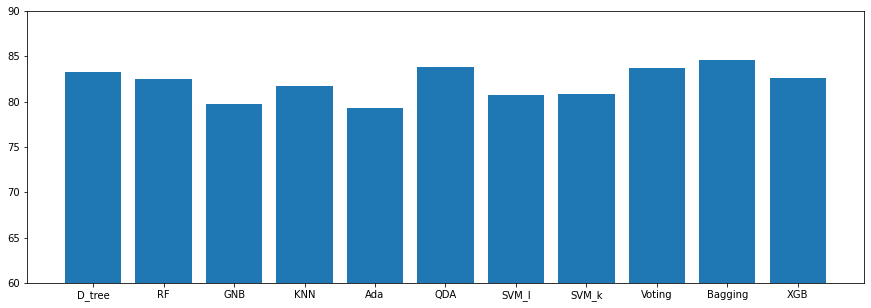

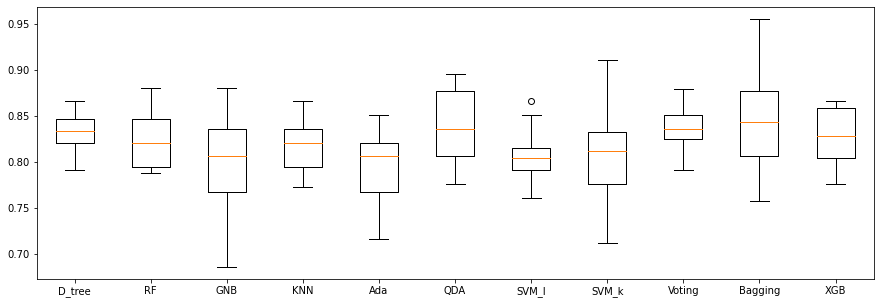

In [22]:
plt.figure(figsize=(15,5))
plt.ylim([60,90])
plt.bar(modelnames,modelmeans);
fig=plt.figure(figsize=(15,5)) 
ax=fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

## 가장 점수가 높았던 모델로 최종 test.cvs파일 데이터로 예측값 구하기

In [23]:
vot=VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                             ('2',RandomForestClassifier()),
                             ('3',SVC(kernel='rbf'))])
vfinal=VotingClassifier(estimators=[('1',xgb),
                                    ('2',QuadraticDiscriminantAnalysis()),
                                    ('3',dt)])

skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies1=cross_val_score(vfinal,X=train_scaled,y=train_target,cv=skf)
print('mean accuracy of','vfinal',':{:.2f}%'.format(accuracies1.mean()*100))
    

mean accuracy of vfinal :84.14%


## 예측값 제출용 submission파일과 결합하기(vfinal Voting 모델)

In [24]:
vot.fit(train_scaled,train_target)
vfinal.fit(train_scaled,train_target)
df1=pd.DataFrame(vfinal.predict(finaltest),columns=['Survived'])#최종 선택 모델에서의 예측 결과값 데이타 프레임으로 만들기
df_sub=pd.read_csv('gender_submission.csv')#제출용 csv파일 읽어와서 예측값과 결합하기 위해 기존 컬럼값 삭제
df_sub.drop(['Survived'],axis=1,inplace=True)
print(df1.head())
print(df_sub.head())

   Survived
0         0
1         0
2         0
3         0
4         0
   PassengerId
0          892
1          893
2          894
3          895
4          896


In [25]:
result_1 = pd.concat([df_sub,df1],axis=1)#예측값과 결합후 새로운 csv파일로 새로 만들기
result_1.to_csv('c:/Users/hcwan/Desktop/titanic kaggle/gender_submission1.csv',index = None)
df_sub1=pd.read_csv('gender_submission1.csv')
print(df_sub1)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [27]:
#몇개나 맞는지 확인하는 과정
df_sub=pd.read_csv('gender_submission.csv')
dftest=df_sub.drop(['PassengerId'],axis=1)


df1=pd.DataFrame(vfinal.predict(finaltest),columns=['Survived'])
df1.info()
dftest.info()
print(dftest.compare(df1).value_counts())
print(100-35/418*100)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
(Survived, self)  (Survived, other)
1.0               0.0                  25
0.0               1.0                  10
dtype: int64
91.62679425837321
